# **Import**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# **Training and Test Data**

In [ ]:
train_url = "https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true"
test_url = "https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true"

traindata = pd.read_csv(train_url)
testdata = pd.read_csv(test_url)

print("Training data shape:", traindata.shape)
print("Test data shape:", testdata.shape)
traindata

Training data shape: (1117957, 22)
Test data shape: (745305, 21)


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


**Features and Target**

In [ ]:
features = [
    'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation',
    'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices',
    'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems',
    'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure',
    'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors'
]

X = traindata[features]
y = traindata['FloodProbability']

**Baseline Train/Test Split**

In [100]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)
r2 = r2_score(y_valid, y_valid_pred)
print(f"Validation R²: {r2}")

if r2 > 0.7:
    print("Strong fit: model explains most variance in flood probability.")
elif r2 > 0.4:
    print("Moderate fit: model captures part of variance but may miss complex effects.")
else:
    print("Weak fit: model explains little variance; non-linear models may be needed.")

Validation R²: 0.8448773362840329
Strong fit: model explains most variance in flood probability.


**OLS Regression**

In [ ]:
X_const = sm.add_constant(X)
olsmod = sm.OLS(y, X_const).fit()
print(olsmod.summary())
print(f"OLS R²: {olsmod.rsquared}")

                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.046e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:55:14   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117936   BIC:                        -5.564e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# **Visualizations**

**Correlation Heatmap**

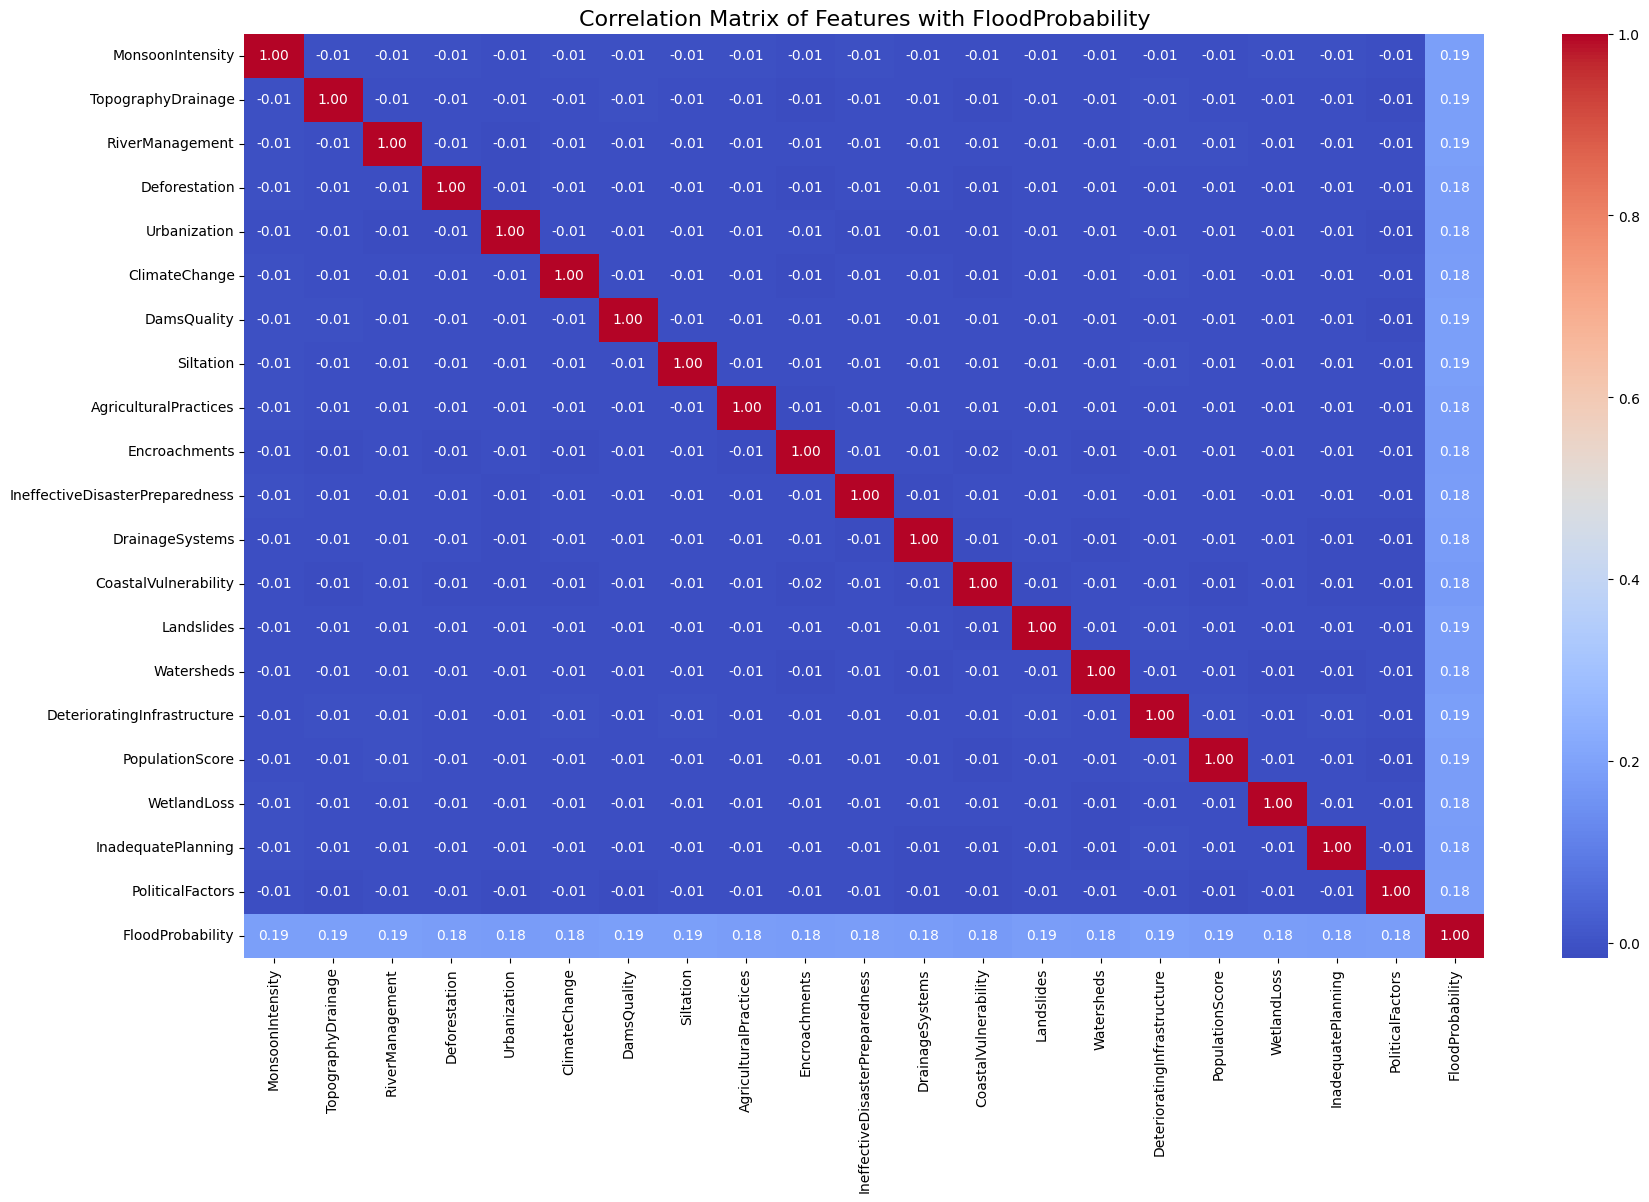

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(
    traindata[features + ['FloodProbability']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f", cbar=True
)
plt.title("Correlation Matrix of Features with FloodProbability", fontsize=16)
plt.show()

**Scatter Plots: Features vs FloodProbability**

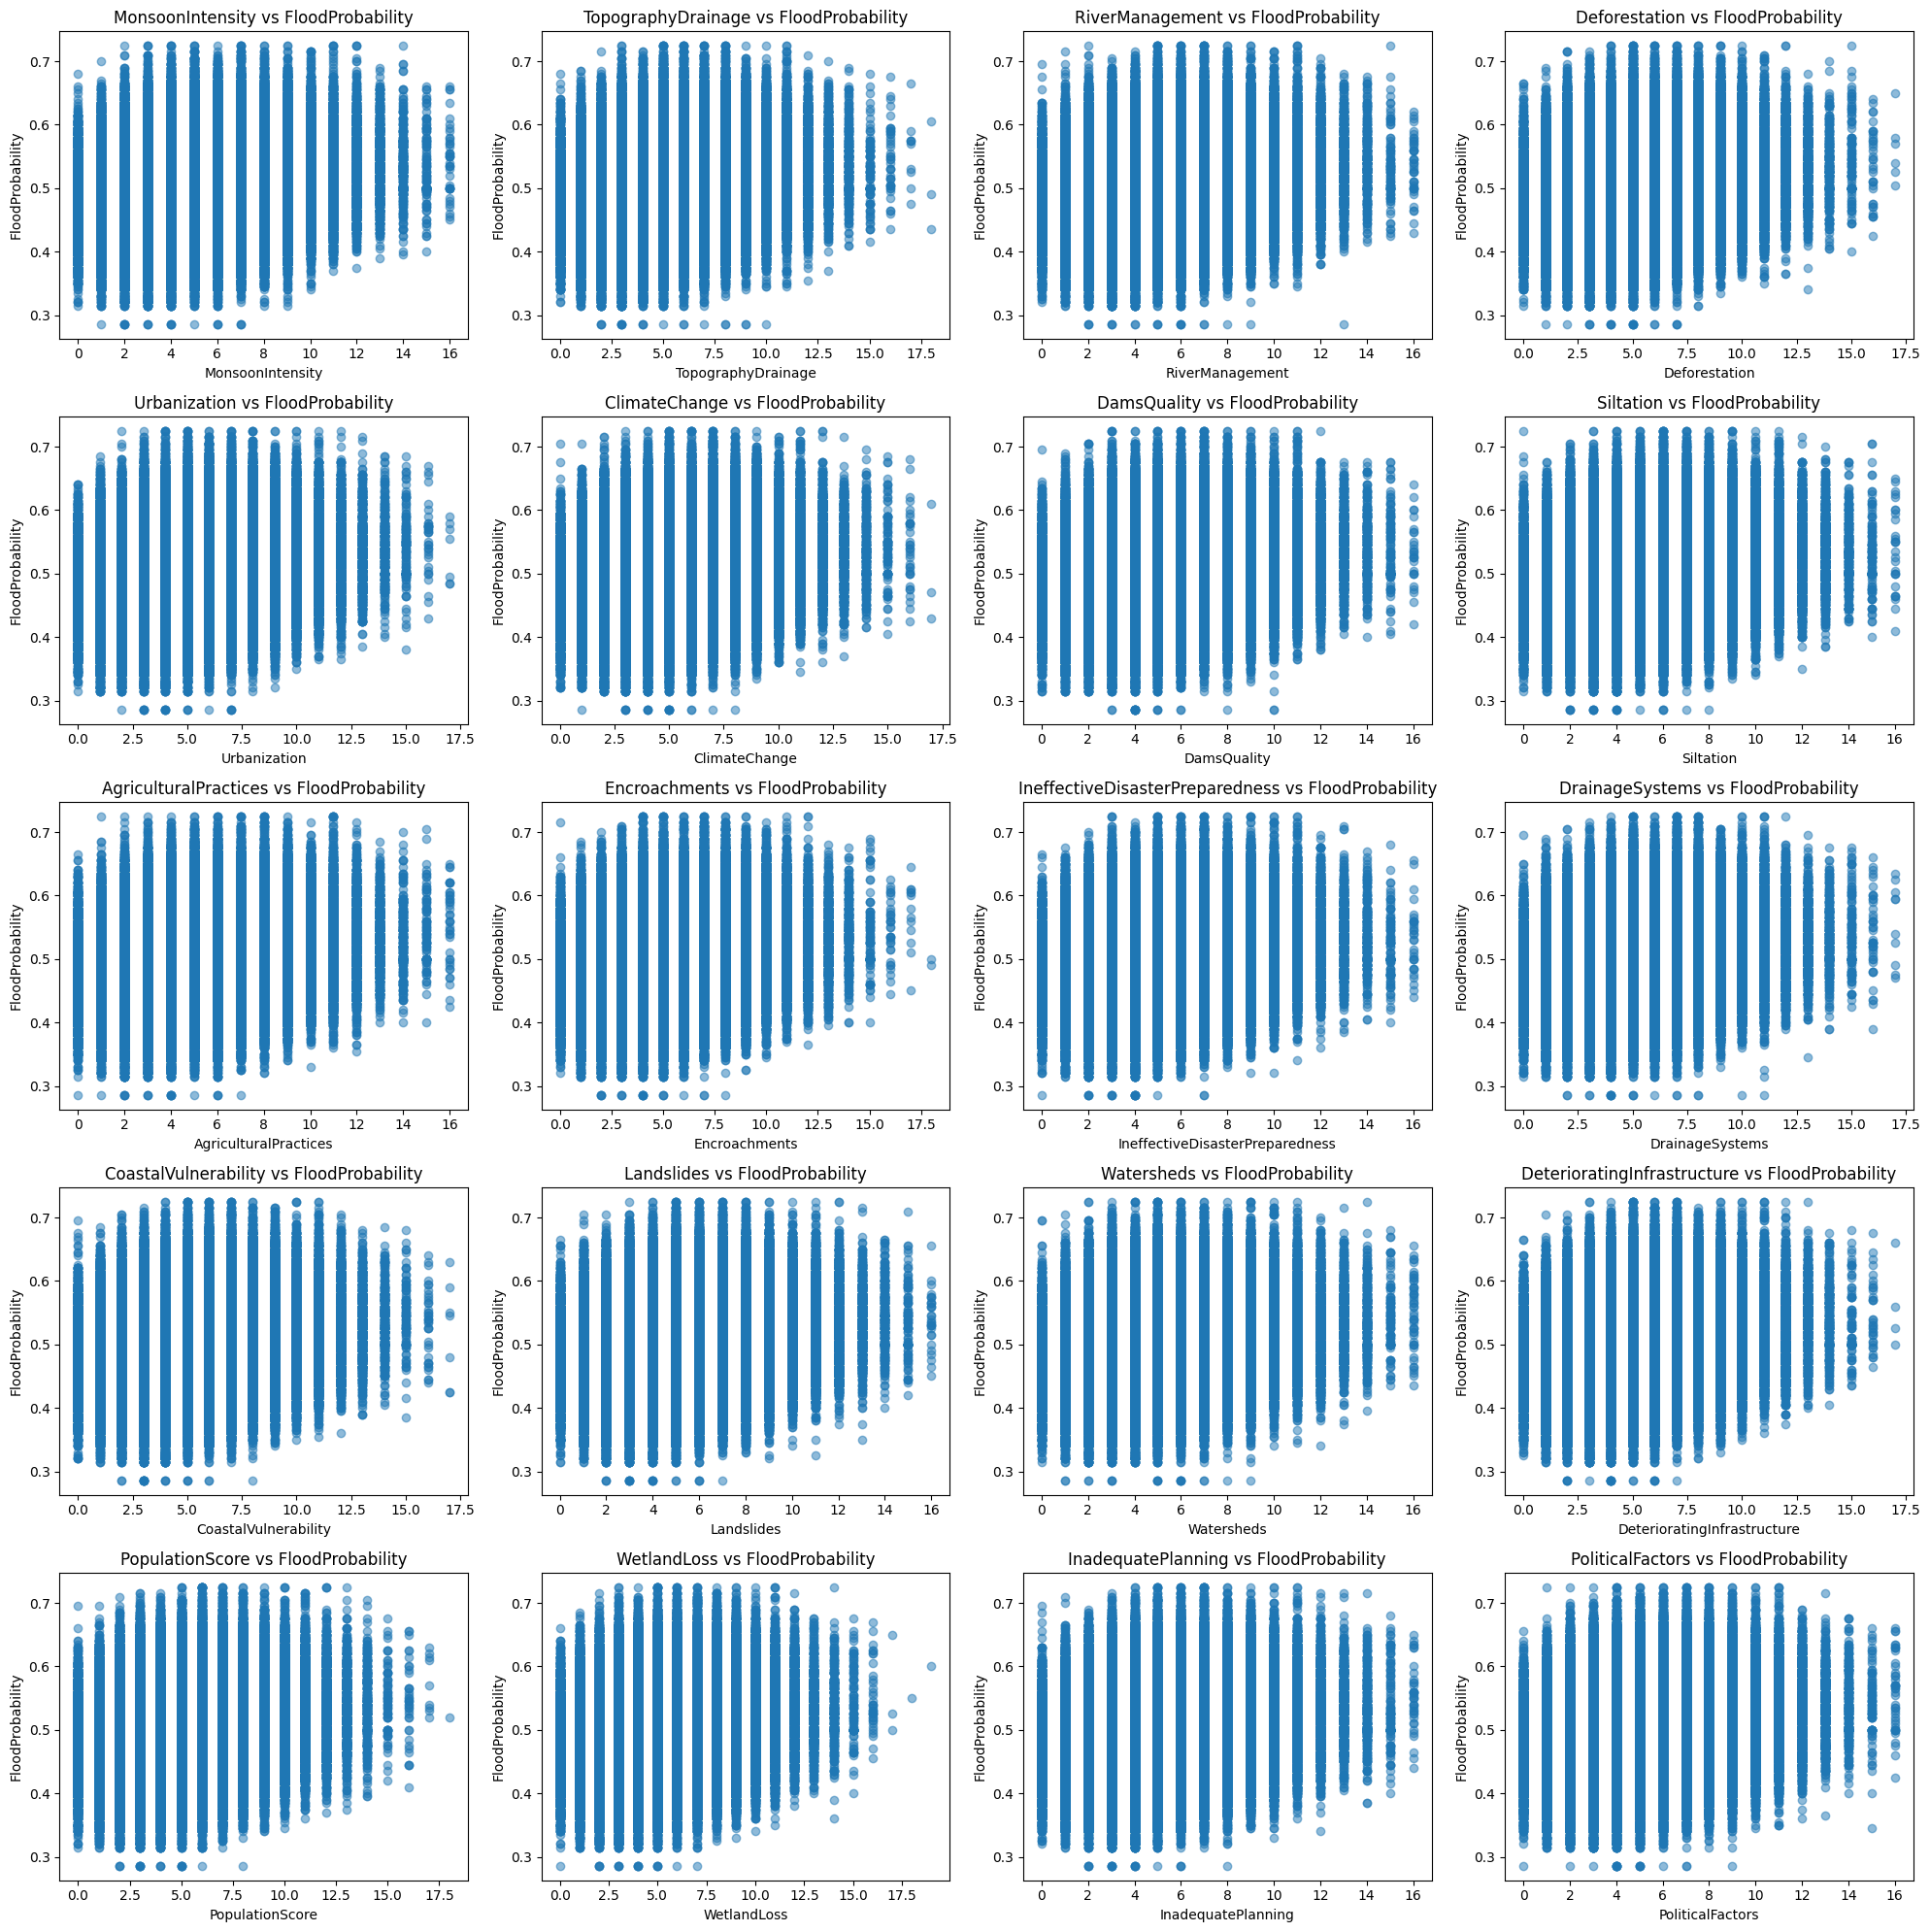

In [73]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(traindata[feature], traindata['FloodProbability'], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('FloodProbability')
    axes[i].set_title(f'{feature} vs FloodProbability')

plt.tight_layout()
plt.show()

**Residual Plot**

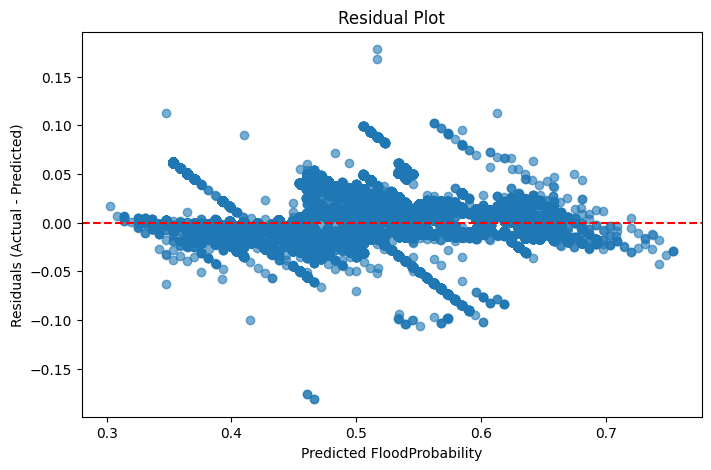

In [74]:
plt.figure(figsize=(8,5))
plt.scatter(y_valid_pred, y_valid - y_valid_pred, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted FloodProbability")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

**Predicted vs Actual Plot**

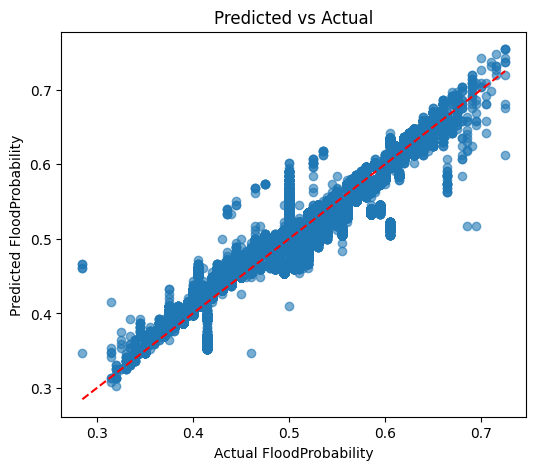

In [77]:
plt.figure(figsize=(6, 5))
plt.scatter(y_valid, y_valid_pred, alpha=0.6)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color="red", linestyle="--")
plt.xlabel("Actual FloodProbability")
plt.ylabel("Predicted FloodProbability")
plt.title("Predicted vs Actual")
plt.show()

# **Experiments**

**Baseline**

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = traindata[features]
y = traindata['FloodProbability']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

baseline = LinearRegression().fit(X_train, y_train)
y_valid_pred_base = baseline.predict(X_valid)
r2_base = r2_score(y_valid, y_valid_pred_base)
print("Baseline Validation R²: {}".format(r2_base))

Baseline Validation R²: 0.8448773362840329


**Experiment 1: Top-5 Features**

In [108]:
corr_with_target = traindata[features + ['FloodProbability']].corr()['FloodProbability'].abs().sort_values(ascending=False)
top5 = list(corr_with_target.index[1:6])
print("Top-5 features:", top5)

X_train_top = X_train[top5]
X_valid_top = X_valid[top5]

model_top5 = LinearRegression()
model_top5.fit(X_train_top, y_train)
y_valid_pred_top5 = model_top5.predict(X_valid_top)
r2_top5 = r2_score(y_valid, y_valid_pred_top5)
print("Top-5 Features Validation R²: {}".format(r2_top5))

Top-5 features: ['DeterioratingInfrastructure', 'MonsoonIntensity', 'DamsQuality', 'TopographyDrainage', 'RiverManagement']
Top-5 Features Validation R²: 0.1843823479961494


**Experiment 2: Dropping Weak Features**

In [109]:
low5 = list(corr_with_target.index[-5:])
reduced_features = [f for f in features if f not in low5]
print("Dropped weak features:", low5)

X_train_reduced = X_train[reduced_features]
X_valid_reduced = X_valid[reduced_features]

model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train)
y_valid_pred_reduced = model_reduced.predict(X_valid_reduced)
r2_reduced = r2_score(y_valid, y_valid_pred_reduced)
print("Reduced Features Validation R²: {}".format(r2_reduced))

Dropped weak features: ['InadequatePlanning', 'Urbanization', 'DrainageSystems', 'Encroachments', 'CoastalVulnerability']
Reduced Features Validation R²: 0.5957726805959711


**Experiment 3: Different Train/Test Split**

In [110]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X, y, test_size=0.3, random_state=42)

model_split = LinearRegression()
model_split.fit(X_train2, y_train2)
y_valid_pred_split = model_split.predict(X_valid2)
r2_split = r2_score(y_valid2, y_valid_pred_split)

print("Different train/test split (70/30)")
print("Validation R²: {}".format(r2_split))

Different train/test split (70/30)
Validation R²: 0.845070099597821


**R² comparison**

In [123]:
print("Baseline: {}".format(r2_base))
print("Experiment 1: {}".format(r2_top5))
print("Experiment 2: {}".format(r2_reduced))
print("Experiment 3: {}".format(r2_split))

Baseline: 0.8448773362840329
Experiment 1: 0.1843823479961494
Experiment 2: 0.5957726805959711
Experiment 3: 0.845070099597821


### **Test File**

In [126]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

X_test = testdata[features]
final_model = LinearRegression()
final_model.fit(X, y)  # Train on full training set
test_predictions = final_model.predict(X_test)

## **Sample Submission File**

In [127]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'
samplefile = pd.read_csv(sample_submission_url)
id = samplefile.pop('id')

submission_df = pd.DataFrame({
    'id': id,
    'FloodProbability': test_predictions
})

submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
